# Segmentation for Marketing (unsupervisied machine learning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Data set load

In [3]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Projects\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.rename(columns={'Gender': 'Sex'}, inplace = True) #pattern how to rename any column inplace true means whatever correction will do it will go to dataset and it will save in real data 

In [7]:
df.head() # head function will give us above some value of dataset and tail will give last value of dataset if in breaket will give any value then it will give us value till there)

,CustomerID,Sex,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.shape # shape is use to find out how many roes and columns are there in our dataset 

(200, 5)

In [11]:
df.describe() #describe will give min ,median and mode and every calculation value 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.dtypes #will give as datatype of each coloumns 

CustomerID                 int64
Sex                       object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
df.isnull().sum() #isnull function will give the null value and sum will give as total null value present in each coloumn 

CustomerID                0
Sex                       0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.info()  #it will all info of our data set null value memory usage and index 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Sex                     200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.drop(["CustomerID"], axis=1, inplace= True) # drop function will use to remove any coloumn and axis 1 means coloumn and axis 0 meas row 

In [18]:
df.head()

,Sex,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\hp\AppData\Local\Temp\ipykernel_6992\476675373.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins =20)
C:\Users\hp\AppData\Local\Temp\ipykernel_6992\476675373.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins =20)
C:\Users\hp\AppData\Local\Temp\ipykernel_6992\

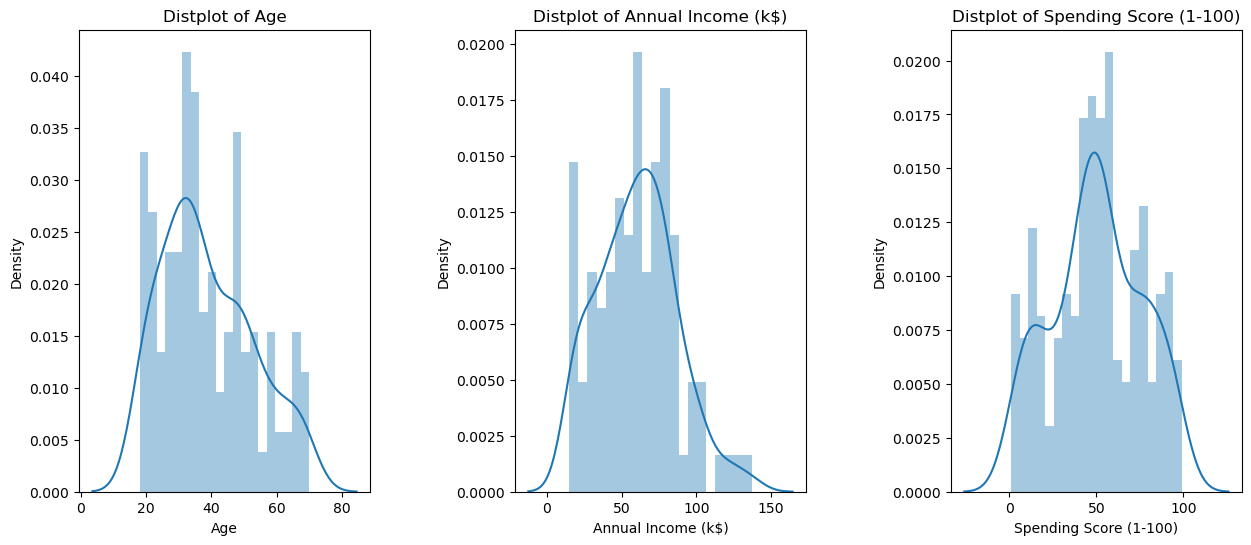

In [20]:
plt.figure(1, figsize =(15,6))
n =0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot( 1, 3 ,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins =20)
    plt.title('Distplot of {}'.format(x))
plt.show()

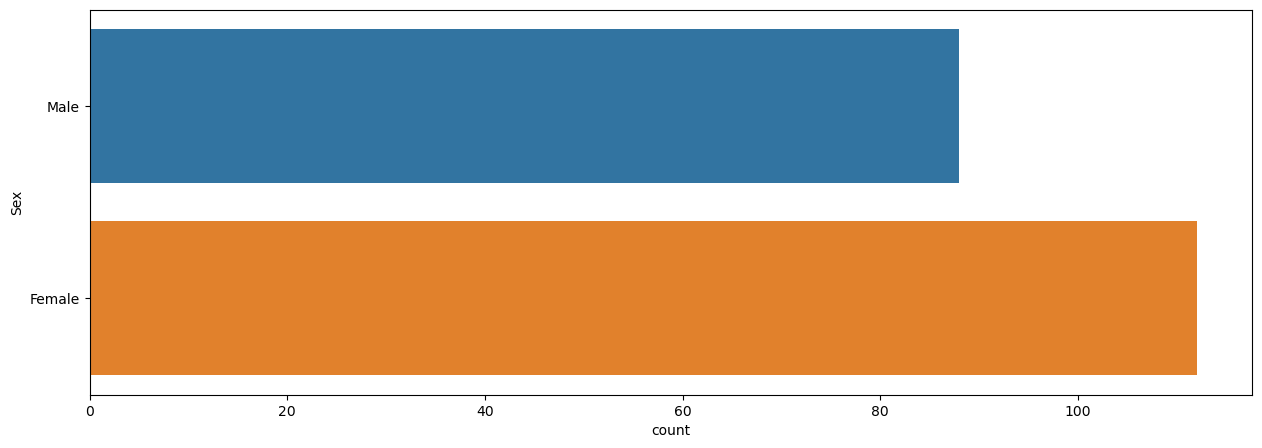

In [22]:
plt.figure(figsize = (15,5))
sns.countplot(y ='Sex', data = df)
plt.show()

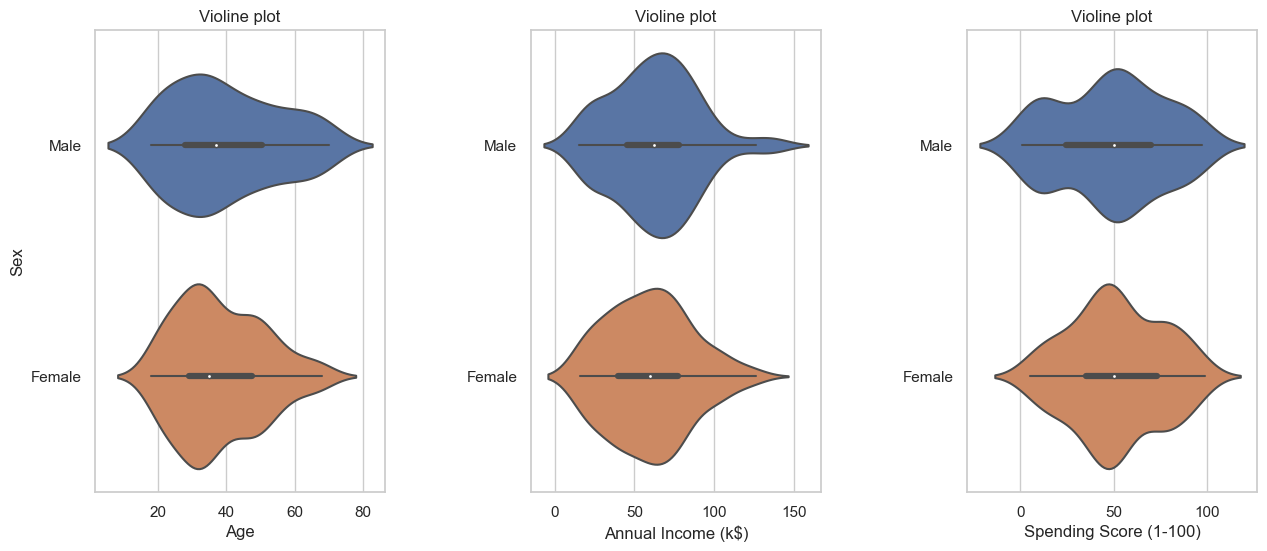

In [27]:
plt.figure(1 ,figsize=(15,6))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1, 3 , n)
    sns.set(style ="whitegrid")
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols, y = 'Sex', data = df)
    plt.ylabel('Sex' if n==1 else '')
    plt.title('Violine plot')
plt.show()

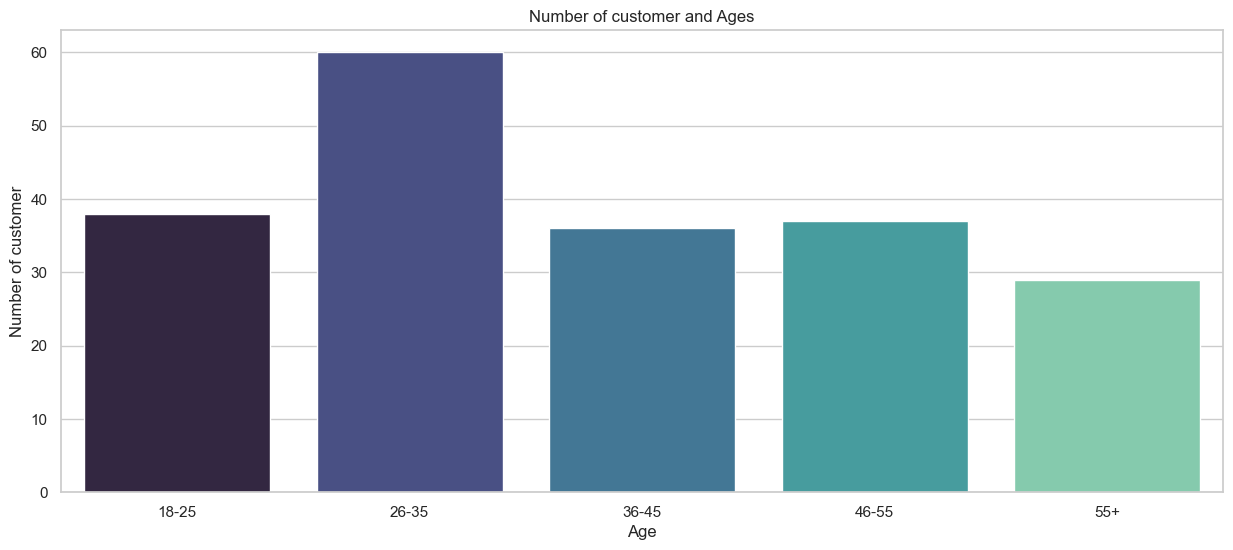

In [31]:
age_18_25= df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35= df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45= df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55= df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_56above= df.Age[(df.Age >= 56)]
agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_56above)]

plt.figure(figsize =(15, 6))
sns.barplot(x =agex, y = agey, palette= "mako")
plt.title("Number of customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of customer")
plt.show()

<Axes: >

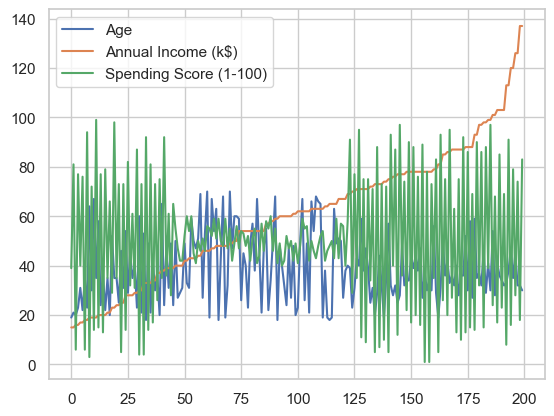

In [32]:
df.plot()# if we wont give any name toh it will give as line chart 

C:\Users\hp\Margi Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


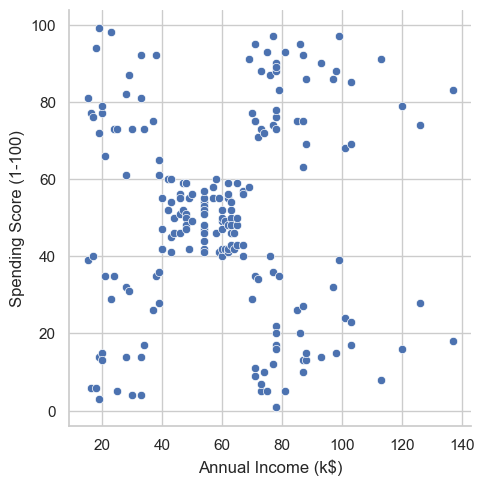

In [33]:
sns.relplot( x ='Annual Income (k$)', y= 'Spending Score (1-100)', data =df)

In [ ]:
#here we can see that in between 40-60 we have some relation in anual income and speding score 

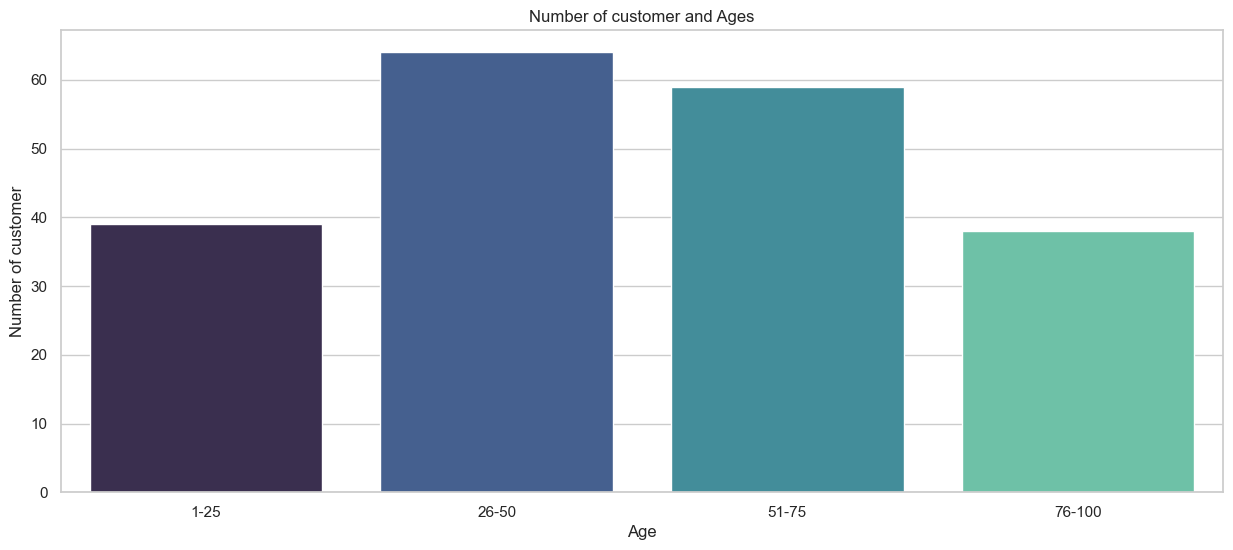

In [36]:
ss_1_25= df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 25)]
ss_26_50= df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 26) & (df["Spending Score (1-100)"] <= 50)]
ss_51_75= df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 51) & (df["Spending Score (1-100)"] <= 75)]
ss_76_100= df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 76) & (df["Spending Score (1-100)"] <= 100)]
ssx = ["1-25", "26-50", "51-75", "76-100"]
ssy = [len(ss_1_25.values), len(ss_26_50.values), len(ss_51_75.values), len(ss_76_100.values)]

plt.figure(figsize =(15, 6))
sns.barplot(x =ssx, y = ssy, palette= "mako")
plt.title("Number of customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of customer")
plt.show()

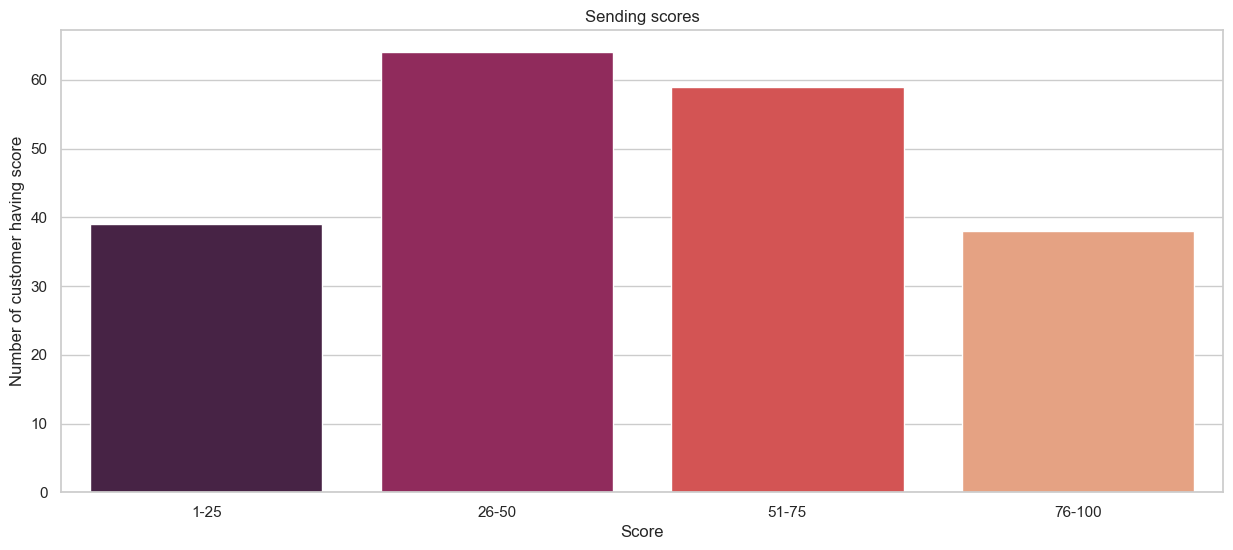

In [37]:
ss_1_25= df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 25)]
ss_26_50= df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 26) & (df["Spending Score (1-100)"] <= 50)]
ss_51_75= df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 51) & (df["Spending Score (1-100)"] <= 75)]
ss_76_100= df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 76) & (df["Spending Score (1-100)"] <= 100)]
ssx = ["1-25", "26-50", "51-75", "76-100"]
ssy = [len(ss_1_25.values), len(ss_26_50.values), len(ss_51_75.values), len(ss_76_100.values)]

plt.figure(figsize =(15, 6))
sns.barplot(x =ssx, y = ssy, palette= "rocket")
plt.title("Sending scores")
plt.xlabel("Score")
plt.ylabel("Number of customer having score")
plt.show()

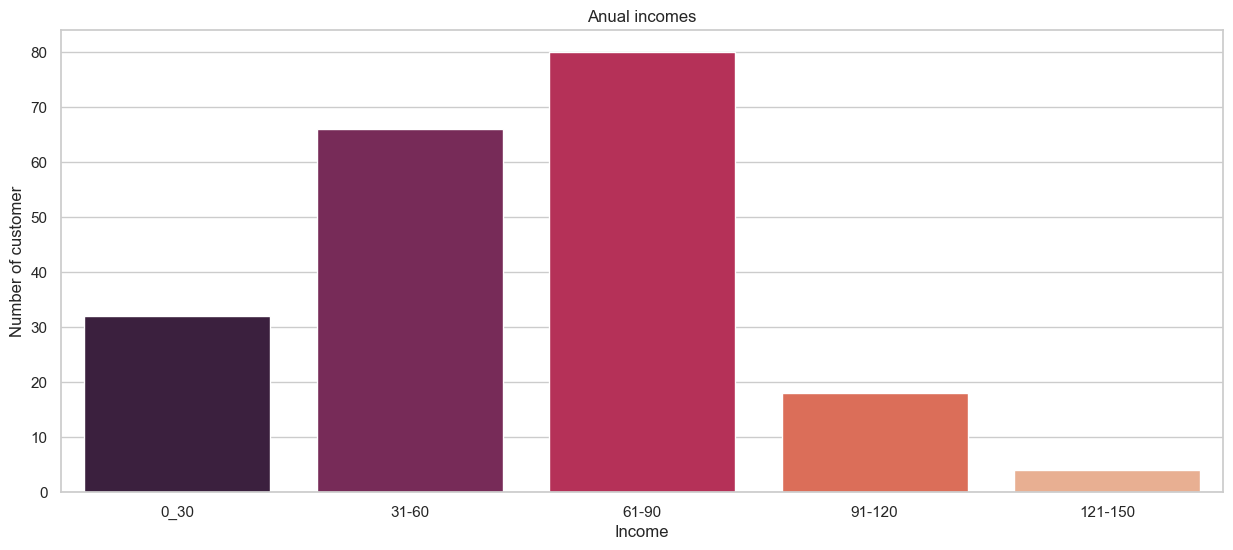

In [39]:
ai0_30= df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60= df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31 ) & (df["Annual Income (k$)"] <= 60)]
ai61_90= df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120= df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150= df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]
aix = ["0_30", "31-60", "61-90", "91-120", "121-150"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize =(15, 6))
sns.barplot(x =aix, y = aiy, palette= "rocket")
plt.title("Anual incomes")
plt.xlabel("Income")
plt.ylabel("Number of customer")
plt.show()

C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

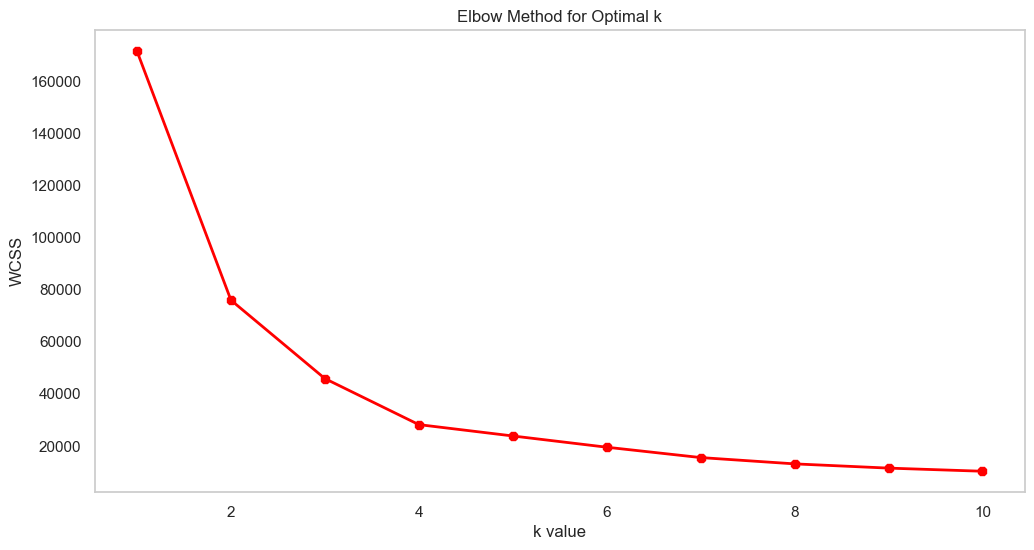

In [49]:
from sklearn.cluster import KMeans
wcss = []

# Calculate WCSS for different number of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.loc[:, ["Age", "Spending Score (1-100)"]].values)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k value")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

In [45]:
#after 4 cluster is normal so we will take k value as 4

In [52]:
kmeans = KMeans(n_clusters=4)  # Corrected to 'n_clusters'

# Fit the model and predict the clusters
x1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values
labels = kmeans.fit_predict(x1)

# Print the labels
print(labels)

C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 2 3 2 0 2 3 2 3 2 3 2 3 2 3 2 0 0 3 2 0 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3
 2 3 2 1 2 1 0 3 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 2 0 2 1 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 1 2
 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 2 3 2 3 2 0
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [53]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]]


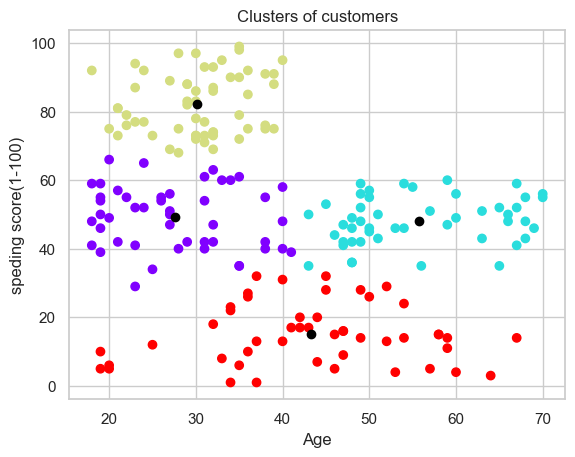

In [54]:
plt.scatter(x1[:,0],x1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of customers")
plt.xlabel('Age')
plt.ylabel('speding score(1-100)')
plt.show()

C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

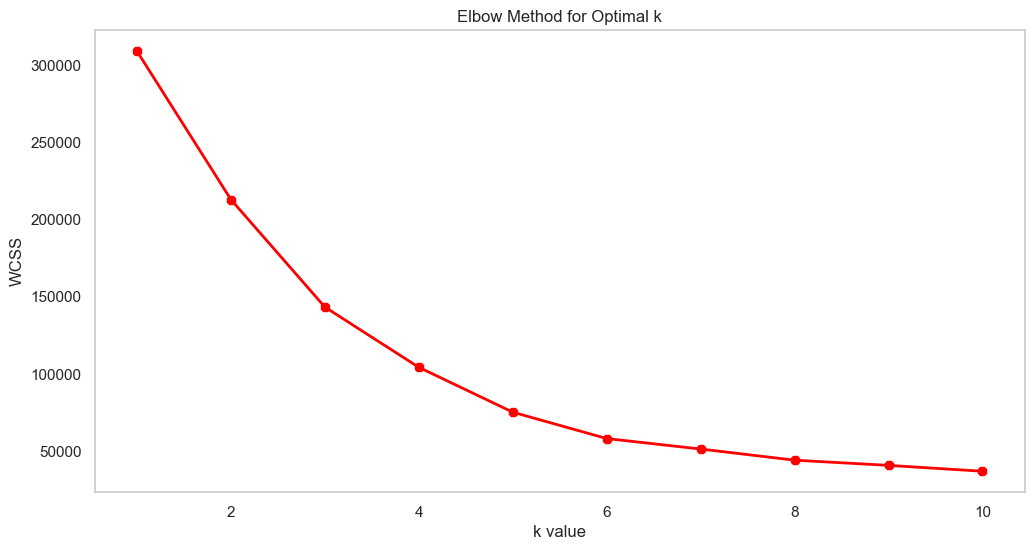

In [57]:
X2= df.iloc[:,1:]
wcss = []

# Calculate WCSS for different number of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k value")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

In [58]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [59]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [42.9375     55.0875     49.7125    ]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [25.27272727 25.72727273 79.36363636]]


C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\Margi Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


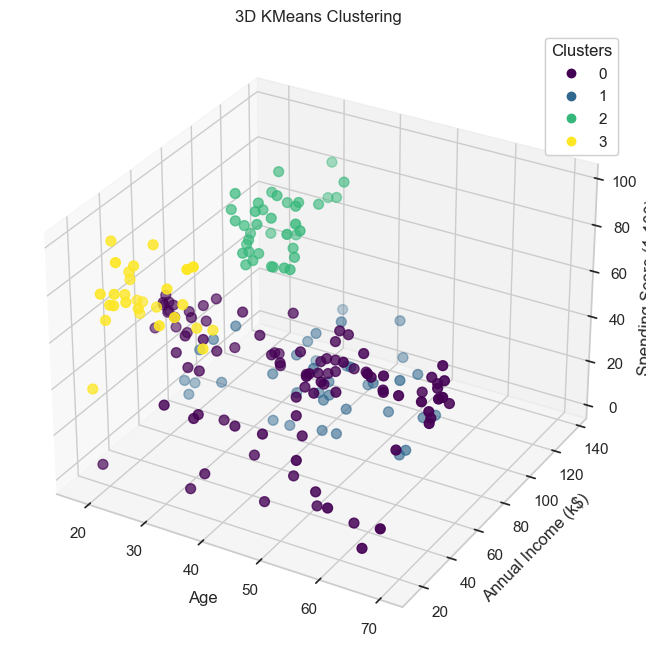

In [62]:
from mpl_toolkits.mplot3d import Axes3D
x1 = df.loc[:, ["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

# Create the KMeans model with the correct number of clusters
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(x1)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
sc = ax.scatter(x1[:, 0], x1[:, 1], x1[:, 2], c=labels, s=50, cmap='viridis', marker='o')

# Labeling the axes
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D KMeans Clustering')

# Adding a legend
legend1 = ax.legend(*sc.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()